In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
from scipy.optimize import curve_fit
import scipy.special as sf

#%matplotlib notebook

In [ ]:
Zmumu_Run2011A = 'https://raw.githubusercontent.com/Tuo96960/3511-Fall-2022/main/Module7/Lecture/Data/Zmumu_Run2011A.csv'

df = pd.read_csv(Zmumu_Run2011A)

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          Run  Event    pt1   eta1   phi1     Q1   dxy1   iso1    pt2   eta2  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10578  False  False  False  False  False  False  False  False  False  False   
10579  False  False  False  False  False  False  False  False  False  False   
10580  False  False  False  False  False  False  False  False  False  False   
10581  False  False  False  False  False  False  False  False  False  False   
10582  False  False  False  False  False  False  False  False  False 

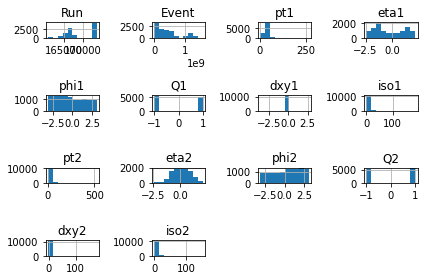

In [ ]:
df.hist()
plt.tight_layout();

In [ ]:
#creating new dataframe collumn
new = np.sqrt(2 * df.pt1 * df.pt2 * (np.cosh(df.eta1 - df.eta2) - np.cos(df.phi1 - df.phi2) ))
df['M'] = new

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10583 non-null  int64  
 1   Event   10583 non-null  int64  
 2   pt1     10583 non-null  float64
 3   eta1    10583 non-null  float64
 4   phi1    10583 non-null  float64
 5   Q1      10583 non-null  int64  
 6   dxy1    10583 non-null  float64
 7   iso1    10583 non-null  float64
 8   pt2     10583 non-null  float64
 9   eta2    10583 non-null  float64
 10  phi2    10583 non-null  float64
 11  Q2      10583 non-null  int64  
 12  dxy2    10583 non-null  float64
 13  iso2    10583 non-null  float64
 14  M       10583 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 1.2 MB


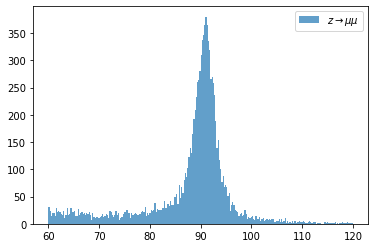

In [ ]:
fig = plt.figure('Z Decay')
plt.hist(new, bins=250, alpha=0.7, label=r'$z\rightarrow \mu\mu$')
plt.legend()

In [ ]:
def breitwigner_rel(M, gamma, M_Z, a, b, c):
  little_gamma = np.sqrt((M_Z**2)*((M_Z**2) + gamma))
  k = (2*np.sqrt(2)*M_Z*gamma*little_gamma)/(np.pi*np.sqrt(M_Z**2 + little_gamma))
  f = k/((M**2 - M_Z**2)**2 + (M_Z**2) *(gamma**2))
  return a*M + b + c*f

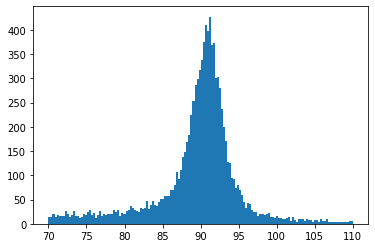

In [ ]:
lowerlimit = 70.0
upperlimit = 110.0
bins = 150

fig = plt.figure()
histogram_mu = plt.hist(new, bins=bins, range=(lowerlimit,upperlimit))
#print(histogram_mu[1][0:])

y_mu = histogram_mu[0]
x_mu = 0.5*(histogram_mu[1][0:-1] +histogram_mu[1][1:])
#print(x_mu)
y_mu_error = np.sqrt(y_mu)


[ 4.09922787e+00  9.09013151e+01 -4.73031368e-01  4.55070776e+01
  2.63794553e+03]


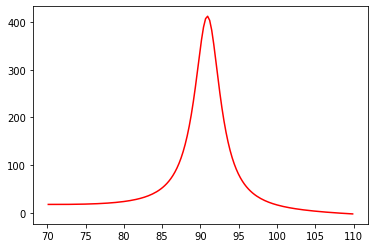

In [ ]:
initials = [2.5, 91, -2, 200, 13000]
best_mu, covariance_mu = curve_fit(breitwigner_rel, x_mu, y_mu, p0=initials, absolute_sigma=True)
print(best_mu)

plt.plot(x_mu, breitwigner_rel(x_mu, *best_mu), 'r-')

In [ ]:
fit = 5
chisq = np.sum( (y_mu - breitwigner_rel(x_mu, *best_mu) )**2 / (y_mu_error)**2)
dof = len(y_mu) - len(best_mu)
print('reduced chi2: ', chisq/dof)

pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print(pvalue)

reduced chi2:  1.9579469055163075
4.6785663710302834e-11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10583 non-null  int64  
 1   Event   10583 non-null  int64  
 2   pt1     10583 non-null  float64
 3   eta1    10583 non-null  float64
 4   phi1    10583 non-null  float64
 5   Q1      10583 non-null  int64  
 6   dxy1    10583 non-null  float64
 7   iso1    10583 non-null  float64
 8   pt2     10583 non-null  float64
 9   eta2    10583 non-null  float64
 10  phi2    10583 non-null  float64
 11  Q2      10583 non-null  int64  
 12  dxy2    10583 non-null  float64
 13  iso2    10583 non-null  float64
 14  M       10583 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 1.2 MB


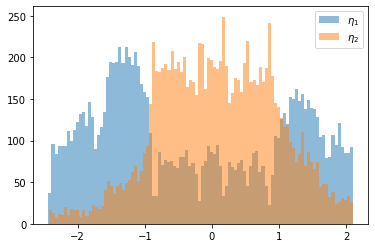

In [ ]:
fig = plt.figure('eta')
plt.hist(df.eta1, bins = 100, alpha = 0.5, label=r'$\eta_1$')
plt.hist(df.eta2, bins = 100, alpha = 0.5, label =r'$\eta_2$')
plt.legend()